In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

Нули - это когда значение `y_pred` равно 0 или 1. По-этому обрезаем справа и слева.

In [ ]:
def calc_logloss(y, y_pred):
    eps = 1e-2
    y_pred_clip = np.clip(y_pred.copy(), eps, 1-eps)
    err = - np.mean(y * np.log(y_pred_clip) + (1.0 - y) * np.log(1.0 - y_pred_clip))
    return err

# 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [ ]:
def std_transform(X):
  X_transformed = X[1:, ].copy()
  X_m = X_transformed.mean(axis=1).reshape(X_transformed.shape[0], 1)
  X_st = X_transformed.std(axis=1).reshape(X_transformed.shape[0], 1)

  X_transformed = (X_transformed - X_m) / X_st
  X_transformed = np.vstack([np.ones(X_transformed.shape[1]), X_transformed])

  return X_transformed

In [ ]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]

    errors, weights = [], [W]

    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))

        errors.append(err)
        weights.append(W)

    if i % (iterations / 10) == 0:
        print(i, W, err)
    return errors, weights

10000 [ 2.48428253 -6.06769399 -5.34752279 13.29132815] 0.1821327998809409
[0.7638486084351401, 0.7506386471050321, 0.7378452152475852, 0.7254672637766546, 0.7135036086829817, 0.7019529424541248, 0.6908138304040976, 0.6800846903920468, 0.6697637550721848, 0.6598490166481533, 0.6503381550863028, 0.6412284518364395, 0.6325166922548618, 0.6241990610399274, 0.6162710359729864, 0.6087272859953277, 0.601561580035852, 0.5947667129449765, 0.5883344543349385, 0.5822555250733228, 0.5765196046826704, 0.5711153710799067, 0.5660305721071839, 0.5612521263486894, 0.5567662489839641, 0.5525585970581395, 0.5486144276649918, 0.5449187621895903, 0.5414565499291387, 0.5382128250334649, 0.5351728516709112, 0.5323222535018262, 0.5296471248007, 0.5271341217947525, 0.5247705338925327, 0.5225443354018928, 0.5204442190529956, 0.5184596131444634, 0.5165806844341241, 0.5147983290272119, 0.5131041535078359, 0.5114904484489367, 0.5099501562546025, 0.5084768350649912, 0.5070646202113932, 0.5057081844648565, 0.504402

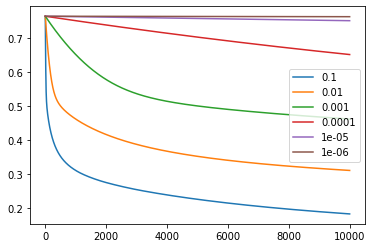

In [ ]:
X = std_transform(X)

for a in [0.1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
  #err, _ = eval_model_new(X, y, alpha = a)
  err, _ = eval_model(X, y, 10000, a)
  print(err)
  plt.plot(err, label=a)

plt.legend()

### Этот тест был тут размещён в первой версии сданной ДЗ, которая появилась до момента, когда яв меняем разобрался со стандратизацией выборки
`ver 1` Здесь из-за входных данных происходит полный бардак. "Обрезка" нулей и едиинц приводит к тому, что функция скачет на краях, видимо. Иначе не знаю в чём дело. 

### Этот текст уже после стандартизации
`ver 2` Всё досаточно тривиально - чем больше обучающая выборка, тем быстрее сходится алгоритм. Пр всей видимости, сходится он до момента, пока не переобучится полностью. Как он может переобучится сказанно далее по тексту. 

## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [ ]:
def calc_pred_proba(W, X):
  return 1/(1+np.exp(-np.dot(W,X)))

## 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [ ]:
def calc_pred(W, X, b):
  y_pred = calc_pred_proba(W,X)
  y_pred = np.where(y_pred > b, 1, 0)

## 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [ ]:
def accuracy(y, y_pred):
  return sum(y==y_pred)/y.shape[0]

In [ ]:
def conf_mat(y, y_pred):
  res = np.zeros([2,2])
  res[0,0] = np.sum(np.where(y == 0, y_pred == y, False))
  res[1,1] = np.sum(np.where(y == 1, y_pred == y, False))
  res[0,1] = np.sum(np.where(y == 0, y_pred != y, False))
  res[1,0] = np.sum(np.where(y == 1, y_pred != y, False))

  return res

In [ ]:
def prec(y, y_pred):
  tn, fp, fn, tp = conf_mat(y, y_pred)
  return tp / (tp+fp)

In [ ]:
def rec(y, y_pred):
  tn, fp, fn, tp = conf_mat(y, y_pred)
  return rp/(tp+fn)

In [ ]:
def f1(y, y_pred):
  p = prec(y, y_pred)
  r = rec(y, y_pred)

  return 2*p*r/(p+r)

## 6. Могла ли модель переобучиться? Почему?

Да, могла. 

Представьте себе объекты двух классов, которые смешаны в середние. А теперь тренируем модель до того, что она начинает избирательно огибать каждый новый объект, в том числе и смешанный. В итоге граница окажется слишком точно заточенной под текущий тренировочный набор, не более. 

## 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [ ]:
def eval_model_l2(X, y, iterations, l2, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]

    errors, weights = [], [W]

    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) + 2*l2*W

        errors.append(err)
        weights.append(W)

    if i % (iterations / 10) == 0:
        print(i, W, err)
    return errors, weights

In [ ]:
def eval_model_l1(X, y, iterations, l1, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]

    errors, weights = [], [W]

    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) + 0.5*l1*W/np.abs(W)

        errors.append(err)
        weights.append(W)

    if i % (iterations / 10) == 0:
        print(i, W, err)
    return errors, weights